<a href="https://www.kaggle.com/code/averma111/pytorch-widedeep-pss3e17?scriptVersionId=134838259" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
BINARY CLASSIFICATION OF MACHINE FAILURES USING PYTORCH WIDEDEEP LIBRARY
</p>
</div>

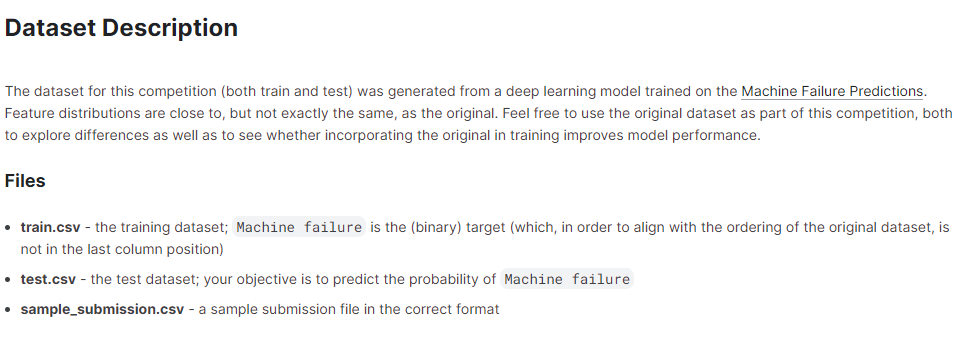
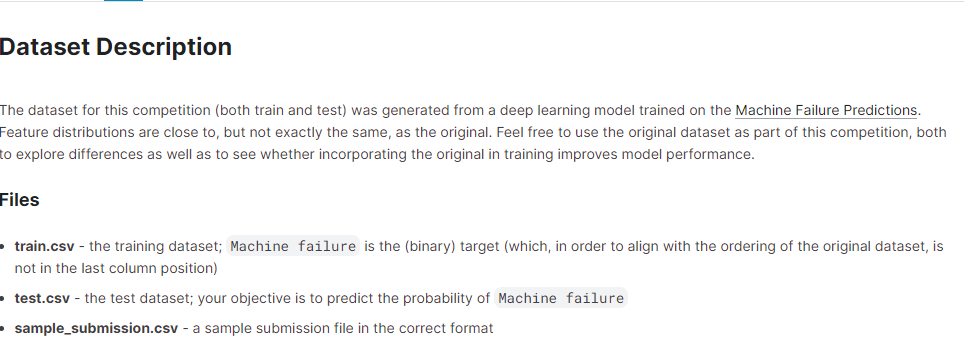

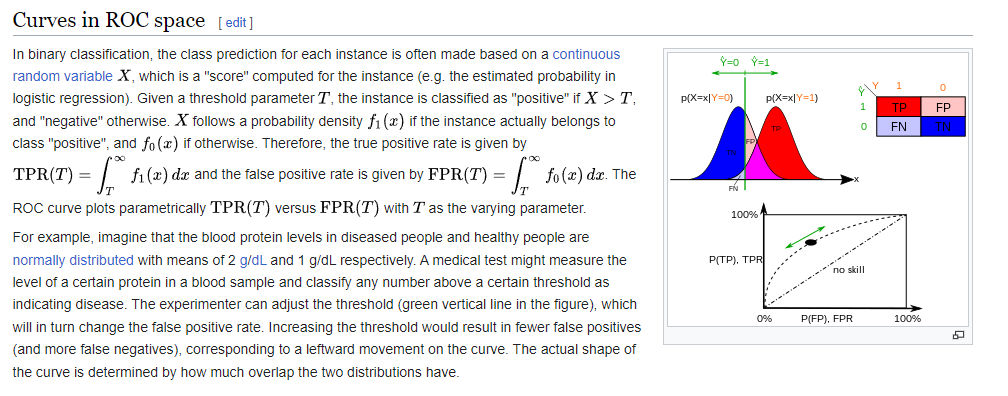

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
DOWNLOAD LIBRARY
</p>
</div>

In [94]:
%%capture
!pip install pytorch-widedeep

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
IMPORTING NECESSARY LIBRARIES
</p>
</div

In [ ]:
import numpy as np 
import pandas as pd 
import os
import datetime
import seaborn as sns
from tqdm.notebook import tqdm
    

import torch
from pytorch_widedeep.preprocessing import WidePreprocessor, TabPreprocessor
from pytorch_widedeep.training import Trainer
from pytorch_widedeep.models import Wide, TabMlp, WideDeep
from pytorch_widedeep.metrics import Accuracy, Precision,F1Score,Recall

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
import itertools

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
CLASS FOR DATA PREPARATION
</p>
</div

In [96]:
class Datapreparation(object):
    
    def __init__(self,root_path):
        self.root_path = root_path
        
    def get_dataframe(self,filename):
        return pd.read_csv(os.path.join(self.root_path,filename))
    
    def summary(self,text, df):
        summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
        summary['null'] = df.isnull().sum()
        summary['unique'] = df.nunique()
        summary['min'] = df.min()
        summary['median'] = df.median()
        summary['max'] = df.max()
        summary['mean'] = df.mean()
        summary['std'] = df.std()
        summary['duplicate'] = df.duplicated().sum()
        return summary
    
    def rename_column(self,df):
        updated_df=df.rename(columns=
                             {"Product ID": "Product_ID", 
                              "Air temperature [K]": "Air_temperature",
                             "Process temperature [K]":"Process_temperature",
                             "Rotational speed [rpm]":"Rotational_speed",
                             "Torque [Nm]":"Torque",
                             "Tool wear [min]":"Tool_wear",
                             "Machine failure":"Machine_failure"}
                            )
        return updated_df
    
    def set_label(self,df):
        self.label = 'Machine_failure'
        return df[self.label]
    
    def set_feature(self,df):
        encoder = LabelEncoder()
        df['Type'] = encoder.fit_transform(df['Type'])
        return df
    
    
    def reduce_oversampling(self,X,y):
        smote_nc = SMOTENC(categorical_features=[0, 6, 7, 8, 9, 10], random_state=42)
        return smote_nc.fit_resample(X,y)

    
    
    def random_split_data(self,X,y):
        return train_test_split(X, y,test_size=0.20,random_state=42)

 
    def standardization_data(self,X_data):
        scaler = StandardScaler()
        std_X_data = scaler.fit_transform(X_data)
        return std_X_data
    

    
data = Datapreparation('/kaggle/input/playground-series-s3e17')
train=data.get_dataframe('train.csv')
train = data.rename_column(train)


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TRAIN DATA SUMMARY
</p>
</div

In [97]:
data.summary('train',train)

,dtypes,null,unique,min,median,max,mean,std,duplicate
id,int64,0,136429,0,68214.0,136428,68214.000000,39383.804275,0
Product_ID,object,0,9976,H29424,NaN,M24859,NaN,NaN,0
Type,object,0,3,H,NaN,M,NaN,NaN,0
Air_temperature,float64,0,95,295.3,300.0,304.4,299.862776,1.862247,0
Process_temperature,float64,0,81,305.8,310.0,313.8,309.941070,1.385173,0
Rotational_speed,int64,0,952,1181,1493.0,2886,1520.331110,138.736632,0
Torque,float64,0,611,3.8,40.4,76.6,40.348643,8.502229,0
Tool_wear,int64,0,246,0,106.0,253,104.408901,63.965040,0
Machine_failure,int64,0,2,0,0.0,1,0.015744,0.124486,0
TWF,int64,0,2,0,0.0,1,0.001554,0.039389,0


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
EXPLORATORY DATA ANALYSIS
</p>
</div

In [98]:
class EDA:
    
    def plot_numerical_distributions(self,dataframe, columns_to_plot, num_rows, num_cols):
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))
        axes = axes.flatten()
        for i, column in enumerate(columns_to_plot):
            sns.histplot(data=dataframe, x=column, hue='Type', kde=True, multiple='stack', ax=axes[i])
            axes[i].set_title(f"Distribution Plot: {column}")
            axes[i].set_xlabel(column)
            axes[i].legend(title='Type', labels=['L', 'M', 'H'])

        if len(columns_to_plot) < num_rows * num_cols:
            for j in range(len(columns_to_plot), num_rows * num_cols):
                fig.delaxes(axes[j])
        fig.suptitle("Distribution Plots for Numerical Features", fontsize=24, fontweight='bold', y=1.10)
        fig.tight_layout()
        plt.show()
        
        
    def plot_machine_reasons(self,trian):
        reason_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
        failures_data = train[train['Machine_failure'] == 1]
        reason_counts = failures_data[reason_columns].sum()
       # Create a colormap
        cmap = plt.get_cmap('magma')
        colors = cmap(np.linspace(0, 1, len(reason_columns)))
       # Plot the reason counts
        plt.figure(figsize=(8, 6))
        bars = plt.bar(reason_columns, reason_counts, color=colors)
       # Add count labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

        plt.xlabel('Reasons for Machine Failures')
        plt.ylabel('Count')
        plt.title('Reasons for Machine Failures (Machine_failure = 1)')
        plt.show()
        
    def plot_outliers(self,train,numerical_columns):
        plt.figure(figsize=(10,6))
        for i, column in enumerate(numerical_columns):
            plt.subplot(2, 3, i+1)
            sns.boxplot(data=train[column])
            plt.title(f'Boxplot: {column}')
            plt.xlabel(column)
        plt.tight_layout()
        plt.show()
        
        
    def plot_roc(self,fpr,tpr):
        plt.rcParams['agg.path.chunksize'] = 100000
        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr,marker='.')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
DISTRIBUTION PLOTS
</p>
</div

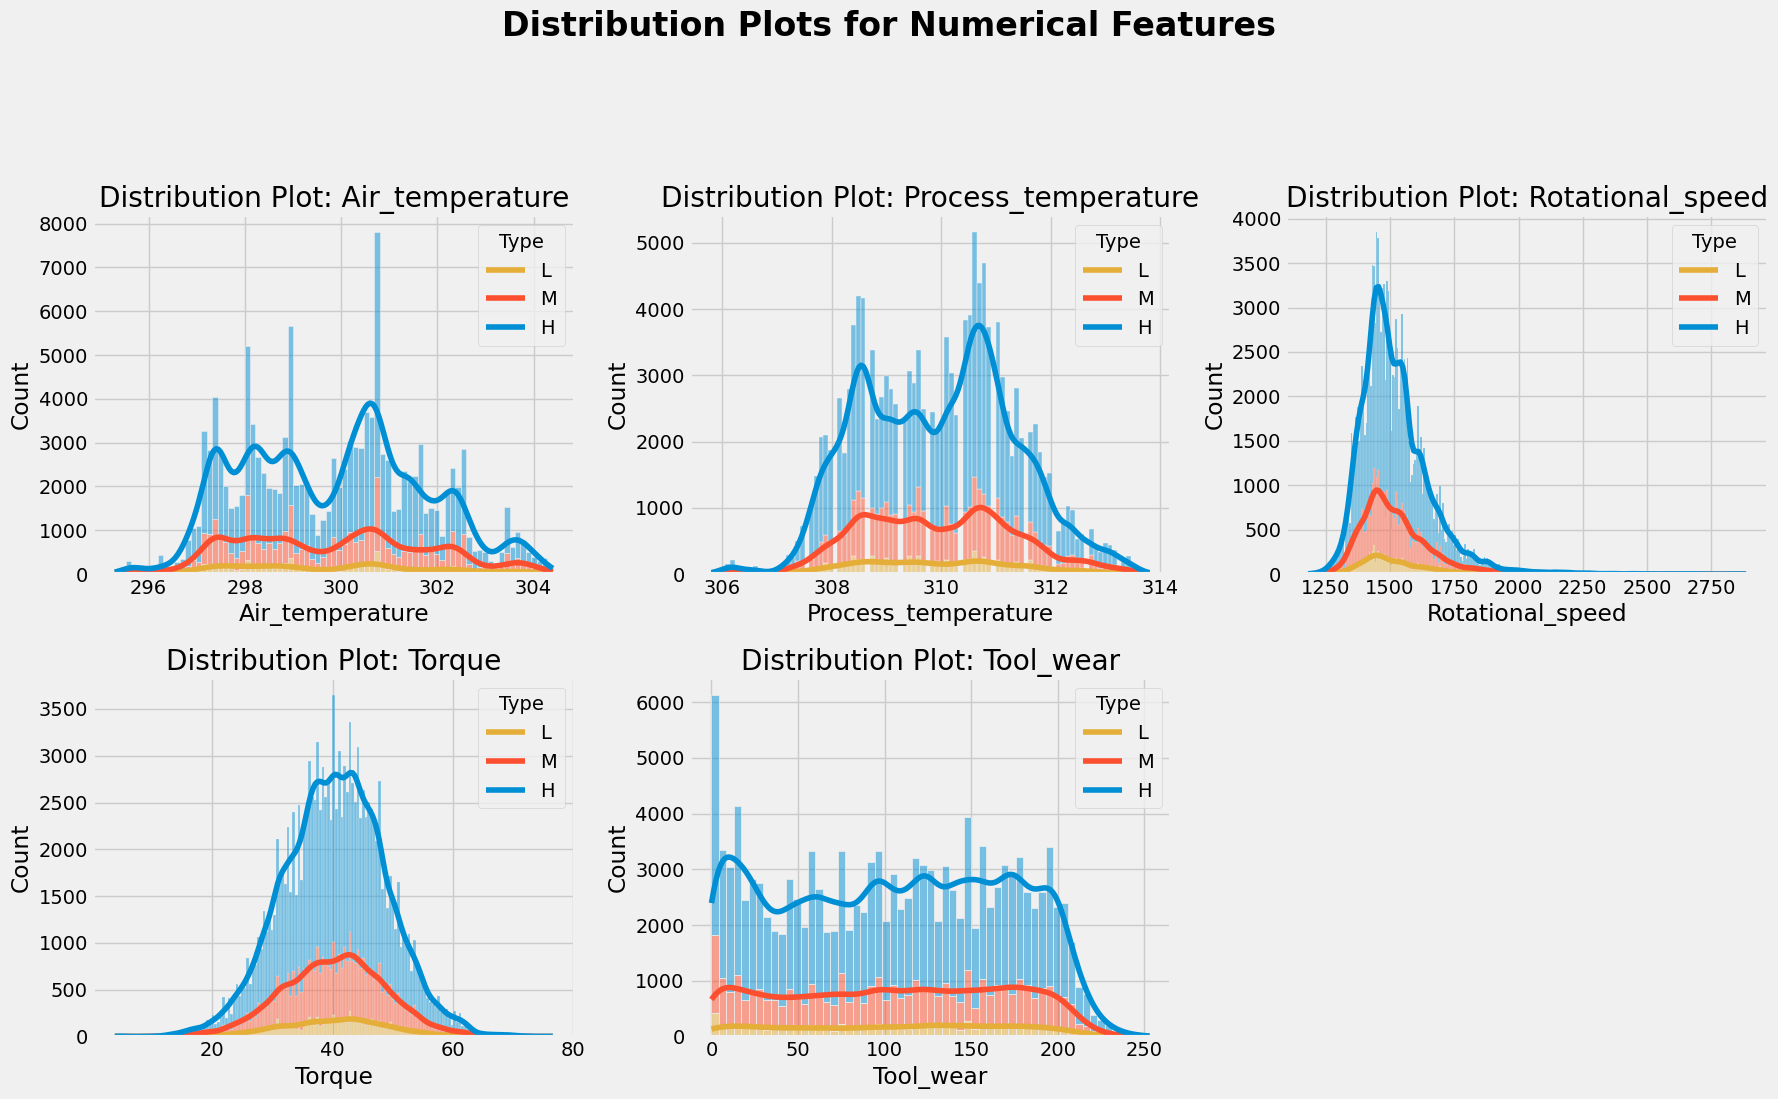

In [99]:
eda = EDA()
num_rows = 2
num_cols = 3
columns_to_plot = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 
                             'Torque', 'Tool_wear']
eda.plot_numerical_distributions(train, columns_to_plot, num_rows, num_cols)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
BAR CHARTS FOR MACHINE FAILURE
</p>
</div

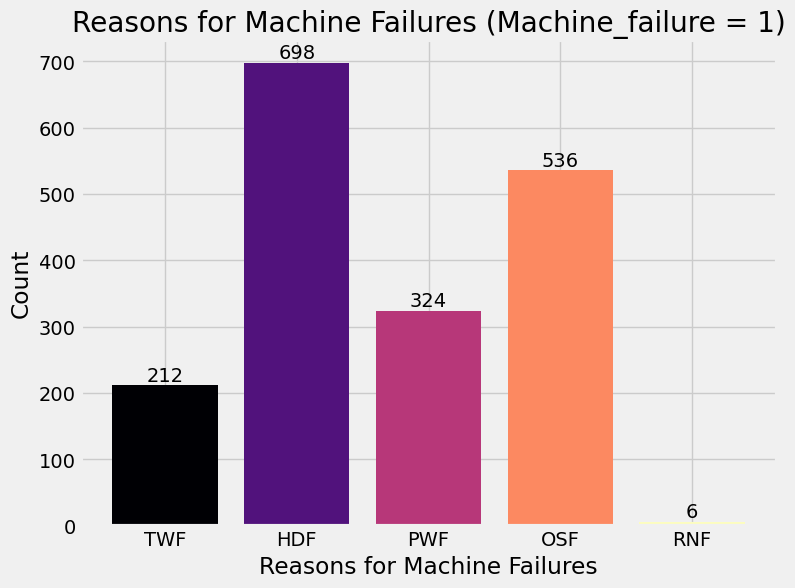

In [100]:
eda.plot_machine_reasons(train)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TRACKING OUTLIERS
</p>
</div

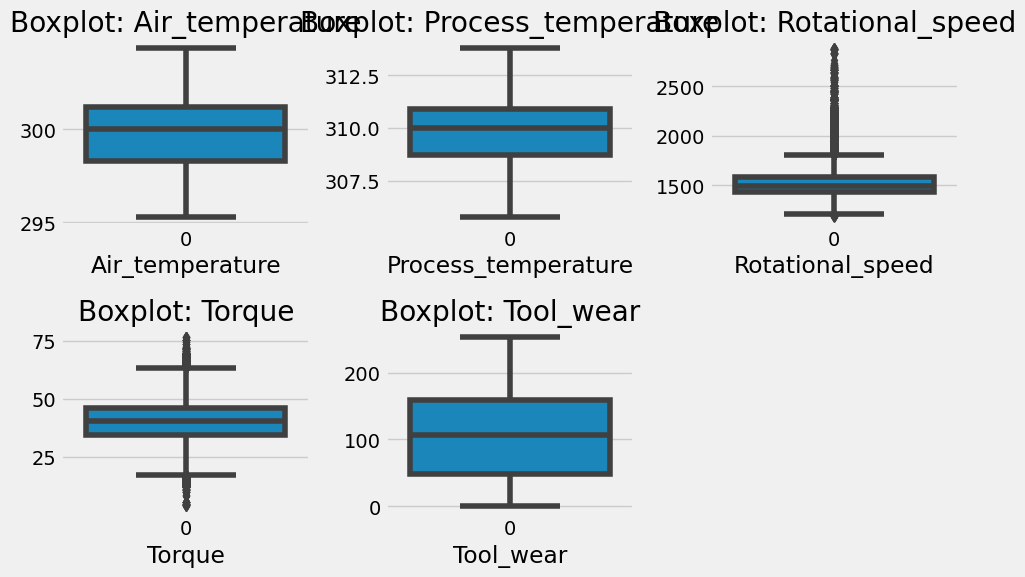

In [101]:
eda.plot_outliers(train,columns_to_plot)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
NORMALIZATION OF TRAIN DATASET
</p>
</div

In [102]:
train_updated = data.set_feature(train)
train_updated.drop(columns=['id','Product_ID'],axis=1,inplace=True)
train_updated.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
SET CATEGORICAL, NUMERICAL AND TARGET COLUMNS
</p>
</div

In [103]:
# Categorical columns
cat_embed_cols = [
    "Type",
    "TWF",
    "HDF",
    "PWF",
    "OSF",
    "RNF"
]
# Continous columns
continuous_cols = ["Air_temperature", "Process_temperature",'Rotational_speed','Torque','Tool_wear']

# TARGET
target_col = "Machine_failure"
target = train_updated[target_col].values

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TABULAR PREPROCESSING
</p>
</div

In [104]:
# deeptabular
tab_preprocessor = TabPreprocessor(
    embed_cols=cat_embed_cols, continuous_cols=continuous_cols
)
X_tab = tab_preprocessor.fit_transform(train_updated)
tab_preprocessor.cat_embed_input

[('Type', 3, 3),
 ('TWF', 2, 2),
 ('HDF', 2, 2),
 ('PWF', 2, 2),
 ('OSF', 2, 2),
 ('RNF', 2, 2)]

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
MODEL DEFINITION
</p>
</div

In [105]:
# Model 
tab_mlp = TabMlp(
    column_idx=tab_preprocessor.column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    cat_embed_dropout=0.1,
    continuous_cols=continuous_cols,
    mlp_hidden_dims=[4, 2],
    mlp_dropout=0.5,
    mlp_activation="leaky_relu",
)

tab_model = WideDeep(deeptabular=tab_mlp)
tab_model

WideDeep(
  (deeptabular): Sequential(
    (0): TabMlp(
      (cat_and_cont_embed): DiffSizeCatAndContEmbeddings(
        (cat_embed): DiffSizeCatEmbeddings(
          (embed_layers): ModuleDict(
            (emb_layer_Type): Embedding(4, 3, padding_idx=0)
            (emb_layer_TWF): Embedding(3, 2, padding_idx=0)
            (emb_layer_HDF): Embedding(3, 2, padding_idx=0)
            (emb_layer_PWF): Embedding(3, 2, padding_idx=0)
            (emb_layer_OSF): Embedding(3, 2, padding_idx=0)
            (emb_layer_RNF): Embedding(3, 2, padding_idx=0)
          )
          (embedding_dropout): Dropout(p=0.1, inplace=False)
        )
        (cont_norm): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (encoder): MLP(
        (mlp): Sequential(
          (dense_layer_0): Sequential(
            (0): Dropout(p=0.5, inplace=False)
            (1): Linear(in_features=18, out_features=4, bias=True)
            (2): LeakyReLU(negative_slope=0.01, in

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
DEFINING THE TRAINER OBJECT
</p>
</div

In [106]:
tab_trainer = Trainer(
    model=tab_model,
    objective="binary",
    optimizers=torch.optim.Adam(tab_model.parameters(), lr=0.001),
    metrics=[Accuracy, Precision,F1Score,Recall],
)

<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
MODEL TRAINING
</p>
</div

In [107]:
tab_trainer.fit(X_tab=X_tab, target=target, n_epochs=10, batch_size=64, val_split=0.2)

valid: 100%|██████████| 427/427 [00:03<00:00, 116.42it/s, loss=0.0393, metrics={'acc': 0.9848, 'prec': 1.0, 'f1': 0.0631, 'rec': 0.0326}]


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TEST DATA PREPARATION
</p>
</div

In [108]:
test=data.get_dataframe('test.csv')
test = data.rename_column(test)
test.head()

,id,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
TEST DATA NORMALIZATION
</p>
</div

In [109]:
test_updated = data.set_feature(test)
test_updated.drop(columns=['Product_ID'],axis=1,inplace=True)
test_updated

,id,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF
0,136429,1,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,1,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,1,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,2,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,1,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,1,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,1,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,1,298.1,307.8,1534,40.3,69,0,0,0,0,0


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
MAKING PREDICTIONS
</p>
</div

In [110]:
#X_wide_te = wide_preprocessor.transform(test_updated)
X_tab_te = tab_preprocessor.transform(test_updated)
preds = tab_trainer.predict_proba(X_tab=X_tab_te)
print(f'The  probabilities are {preds}')

predict: 100%|██████████| 1422/1422 [00:06<00:00, 217.30it/s]


The  probabilities are [[0.99420017 0.00579985]
 [0.99622011 0.00377989]
 [0.99412364 0.00587638]
 ...
 [0.9936406  0.00635942]
 [0.99459064 0.00540933]
 [0.99406183 0.00593817]]


In [111]:
preds=preds.tolist()
prediction_1=[]
for element in preds:
    prediction_1.append(element[1])


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:#c54267;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 30px;
              color:white;">
SUBMISSIONS
</p>
</div

In [112]:
class Submit:
    
    def submit_predictions(self,test_updated):
        df_submit = pd.DataFrame(data={'id': test_updated['id'],'Machine Failure':prediction_1})
        df_submit.to_csv('submission.csv',index=False)
        print('Submission Completed!!')
        return df_submit
        
        
submit = Submit()
df_submit=submit.submit_predictions(test_updated)

Submission Completed!!


In [113]:
df_submit

,id,Machine Failure
0,136429,0.005800
1,136430,0.003780
2,136431,0.005876
3,136432,0.005824
4,136433,0.006493
...,...,...
90949,227378,0.005762
90950,227379,0.004154
90951,227380,0.006359
90952,227381,0.005409
